2025-05-19 17:03:19.269745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 17:03:19.320461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 17:03:19.321573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-19 17:03:20.230218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/student/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

2025-05-19 17:03:22.044940: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


  5/844 [..............................] - ETA: 28s - loss: 2.2559 - accuracy: 0.2031 

2025-05-19 17:03:22.926597: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-05-19 17:03:22.926893: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-05-19 17:03:22.957717: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2025-05-19 17:03:22.957786: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.


844/844 [==============================] - 25s 29ms/step - loss: 0.1743 - accuracy: 0.9483 - val_loss: 0.0564 - val_accuracy: 0.9855
Epoch 2/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0437 - val_accuracy: 0.9863
Epoch 3/5
844/844 [==============================] - 23s 28ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0360 - val_accuracy: 0.9885
Epoch 4/5
844/844 [==============================] - 23s 28ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0330 - val_accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0314 - accuracy: 0.9893
Test loss: 0.0314
Test accuracy: 0.9893
313/313 [==============================] - 3s 9ms/step
Total incorrect predictions: 107


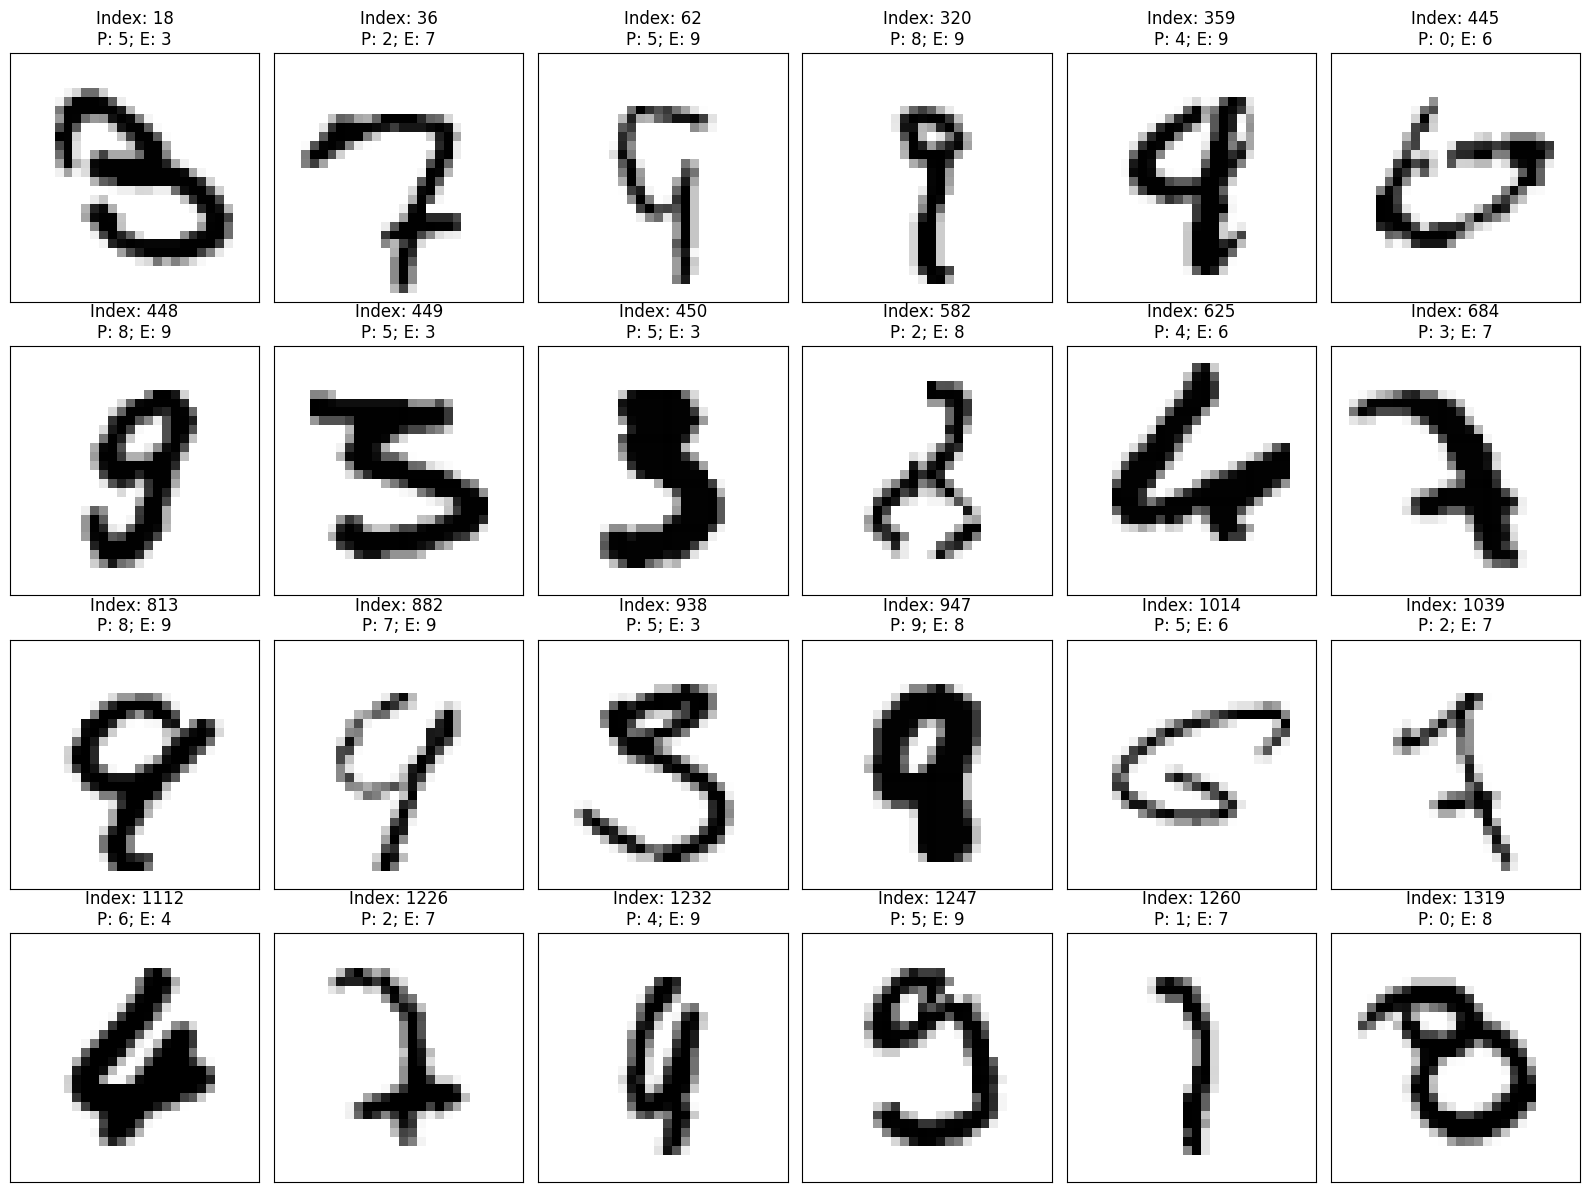

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=100, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

# Compile the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
predictions = cnn.predict(X_test)

# Locate incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

print(f'Total incorrect predictions: {len(incorrect_predictions)}')

# Visualize 24 incorrect predictions
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for ax, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Index: {index}\nP: {predicted}; E: {expected}')
plt.tight_layout()
plt.show()

# Display probabilities for a specific incorrect prediction
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')